# The true story behind object recognition algorithms


<img src="https://media.giphy.com/media/LR6yJOEv7gQVA3Oksq/giphy.gif" width="800" align="left">

Object recognition is one of machine learning big successes. The progress that we have made in this field is enhancing many industries and innovations, such as self driving cars, text recognition, medicine tools, face identification (apple's face id) etc.

### How does it work ?

Through this notebook, you will discover how it all started and the basics of image recognition.

- first, you will get to know the main ideas behind the algorithms.

- then, you will implement a digit recognition algorithm.

- finally, you will use a state of the art object recognition model to detect cars and buses in the images you brought to this workshop.

### How to use this notebook

This notebook is composed of cells :
- some cells contain textual explanations
- some cells contain code

You will advance in this notebook by reading the text cells and **running the code cells**. To run a code cell, you need to select it and hit the **&#9658; Run** button at the top.

**Some cells are incomplete ; you will need to complete them before running them**. 
<br/>These incomplete cells are explicitly marked with a    **# _--------------------------TO DO-------------------------_**    header.

<br><br><br>
<div style="text-align:center; font-weight : bold; font-size : 1.25em">Table of contents</div>
<br>

1. Neural networks and why we created them
2. Convolutional neural networks (CNN)
3. Creating a handwritten digit recognition CNN
4. Using a pre-trained state of the art model

---
## 1. Neural networks

### 1.1 What is a neural network ?

#### 1.1.1 Structure

Based on nature, an artificial neural network is a **set of connected units or nodes (called neurons)**, that form a network as a whole.

The operation of a complete neural network is straightforward : we enter variables as inputs, and after some calculations, an output is returned.

For example, inputs could me measurements about a person's body, and the output whether it's a woman or a man (of course, a neural network would be overkill for that application).

Artificial neural networks are usually **represented as layers of neurons**, where the neurons of one layer are connected to the following layer. <br> Each connection between two neurons has a **weight** (for example 0.65, -1.2, 3.4 ...).

This is a representation of a neural network:

<img style="float: left;margin-right:40px" src="images/pt1-nn/med_nn.png" width="50%" >

<br> 

Neural networks can usually be read from left to right : 

- &nbsp; the first layer is the layer in which inputs are entered.
- &nbsp; in the middle, we have hidden layers (2 in this example) : hidden layers are basically layers between the inputs and the outputs.
- &nbsp; the last layer contains the outputs

Note that the +1 neurons are the equivalent of a standalone constant in a mathematical function, for example $a$ in $f(x) = a + bx + cx²$.



#### 1.1.2 What does a neuron do ?

Artificial neurons are **inspired from biological neurons' cells**.

Here is how biological neurons work :

<img style="float: left; margin-right : 40px" src="images/pt1-nn/bio_neuron.PNG" width="50%" >

<br><br><br>

- each neuron has dendrites which **receive incoming signals** sent by other neurons. <br><br>
-  If the neuron receives a **high enough** level of signals, the neuron sends an **electrical pulse into the terminals** which are received by the following neurons. Note the "high enough level of signal" part, which is very important. This is what allows our brain to be so flexible and adapt to any problem.

<br><br><br><br>

<img style="float: right;margin-right:100px" src="images/pt1-nn/neuron.PNG" width="40%" >

An artificial neuron behaves similarly :

- a neuron sums all the inputs multiplied by the weights of the connections
> $1 * \theta_{0} + x_{1} * \theta_{1} + x_{2} * \theta_{2} + x_{3} * \theta_{3}$
- the neuron applies a **non-linear function**, called **activation function**, to the sum: 
> $output = f(1 * \theta_{0} + x_{1} * \theta_{1} + x_{2} * \theta_{2} + x_{3} * \theta_{3})$

<br><br><br><br>
This non-linear function is the equivalent of the "**high enough** level of signals" part for the biological neurons. The activation function basically determines if the neuron transmits the information to the following neurons or not.  For example, a basic non-linear activation function is:
- if output > 0, transmit output
- if output <= 0, transmit nothing

Actually, this basic non-linear function is one of the most used non-linear activation functions and is called the ReLu (Rectified Linear Unit) activation function.

### 1.2 How does a neural network learns to make predictions ?

Now that we know that a neural network is basically _input - linked layers of neurons - output_ , the remaining question is :

**How do we get a neural network to do what we want it to do?**

1. We choose an input for our network.
2. We choose an output for our network.
3. We train the network to predict the correct output for any input : training the network means adjusting the weights of the connections between the neurons. On the following image, the weights are $\theta_{0}, \theta_{1}, ..., \theta_{n-1}, \theta_{n}$ :

<img src="images/pt1-nn/neuron.PNG" width="450px" >


The adjustment of the weights is automatic and works the same as when we, humans, train to learn something new.

Imagine you are training to learn to shoot a basketball. <br>

You take a first try :

- the orange basketball represents your shot.
- the transparent green ball represents what you try to achieve.

<img style="float: left;margin-right:40px" src="images/pt1-nn/b1.png" width="50%" >

The total error of your shot is the distance between what you aim for and where your shot lands. Your goal is to minimize this total error. The total error can be written as:

$ totalError = \sqrt{(x_{try} - x_{desired})^2 + (y_{try} - y_{desired})^2 } = \sqrt{(34 - 0)^2 + (-22 - 0)^2 } = 40.5 cm$

This total error is made of the error along the $x$ axis and the error along the $y$ axis. In order to reduce the total error, you must reduce the sub-errors along $x$ and $y$. 

This is how we did on our first shot :

- $xError = x_{try} - x_{desired} = 34 - 0 = 34 cm$
- $yError = y_{try} - y_{desired} = (-22) - 0 = -22 cm$

<br><br>

As a result, we will adjust our aim slightly towards the left and add some strength. **We adapted our behavior according to our error in order to reduce the error in the next shot**.

We focus hard and take another shot.

<br><br>

<img src="images/pt1-nn/math_meme.webp">

<br><br>

<img style="float: left;margin-right:40px" src="images/pt1-nn/b2.png" width="50%" >

<br><br><br>

- $ totalError = \sqrt{(18 - 0)^2 + (15 - 0)^2 } = 23.5 cm \rightarrow$ our second shot is significantly better. **We're improving**.
<br><br>
- $xError = x_{try} - x_{desired} = 18 - 0 = 18 cm \rightarrow$ adjust again towards the left
<br><br>
- $yError = y_{try} - y_{desired} = 15 - 0 = 15 cm \rightarrow$ reduce our strength slightly

<br><br><br><br><br>

Finnaly, we score our first shot:

<img style="float: left;margin-right:40px" src="images/pt1-nn/b4.png" width="50%" >

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

The training of an artificial neural network is **very similar to this example**.

The main difference is that we, humans, train much faster because we have intuition and generalize our knowledge much better. Artificial **neural network don't have any intuition**:

> if a human takes his first try ever at shooting a basketball, it will not fall far from the net. Maybe 50 cm away at most.<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\neq$<br>
>if a machine with a neural network takes its first try ever at shooting a basketball, the ball will land on Mars.

**Hence, a neural network needs to experiment a lot before it is trained and has good performance on unknown data.**

A neural network requires at least **10 000 samples** (different inputs) in order to be trained. **The more data we have, the better our neural network will be**.<br>
This is the reason why **gathering data is so crucial nowadays** : our models' performance depends on it.

Now that you understand the concept of training according to the error, we can sum up how a neural network trains :

>Until the neural network has good performance, repeat:
>- feed a new input
>- compute the error for this input
>- adjust the weights $\theta_{0}, \theta_{1}, ..., \theta_{n-1}, \theta_{n}$

At the end of training, the combination of the $\theta$ weights in the network is close to optimality and allows to make good predictions on most new unknown inputs.

---
## 2. Convolutional neural networks

<br>

Before starting this workshop, you surely had heard of neural networks. But had you heard of **convolutional neural networks** ?
Convolutional neural networks are currently the **most popular AI models for object detection / recognition** because they achieve by far the best results in this field.

One of the pioneers of convolutional neural networks is **Yann LeCun**, a French researcher.

In 1998, Yann LeCun and his collaborators at AT&T Labs were experimenting with a large range of machine learning solutions for **handwritten digits recognition**.<br>
In this context, they developed **the first convolutional neural network architecture, which was named LeNet** (LeCun + neural network).

LeNet was a huge success and was soon used by many banks for automatic bank checks recognition.

A **Convolutional Neural Network (CNN)** is a special kind of multi-layer neural network, designed to recognize visual patterns directly from images.

||
|:-|:-|
|input|image|
|processing|convolutional neural network|
|output|label that best fits the image content among the labels that we chose|

**Example :**

Handwritten digit recognition.

||
|:-|:-|
|input|image with a written digit|
|processing|convolutional neural network|
|output|probabilities for the digit to be 0, 1, 2, 3, 4, 5, 6, 7, 8 or 9. The predicted output is the digit with the highest probability|

### 2.1 The input : how to pass an image to a neural network ?

For computers, an image is represented by **3 pixel layers** (RED, GREEN, BLUE → **RGB**) :

Each layer is a 2D matrix with **values between 0 and 255** :
- 0 is black
- 255 is the color (red, green or blue) at its most pronounced level

When we stack the 3 layers, we obtain a 3-dimensional matrix.

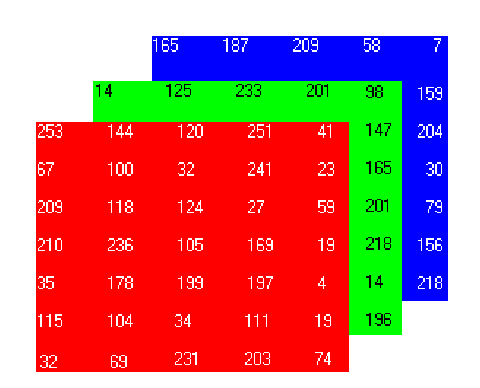

We can use this 3-D matrix as the input of a convolutional neural network, or decide to convert our images to grey scaled images if the colors are irrelevant. <br>
Grey scaled images have a **single layer of pixels** (2-D matrix) compared to colored images.

In part 3. of this workshop, you will implement a digit recognition CNN that uses grey scaled images as inputs.

### 2.2 The structure of a CNN : how is it special compared to a regular neural networks ?

When we look at a picture, our eyes look for **features** such as certain shapes or objects that we know in order to understand the picture. 

However, at the most basic level, shapes are composed of curves, edges, circles, squares etc. Our eyes are used to detect those basic shapes and we don't need to think about it, but this knowledge isn't granted for a computer.

A computer is able to perform object recognition by looking for **low level features such as edges and curves**, and then building up to more **abstract concepts**.

In order to get an intuition of how convolutional neural networks work, this short extract from an AI conference clearly explains the concept :

<video controls src="images/pt2-cnn/cnn_conf.mp4" width="95%"/>

_Source : https://www.youtube.com/watch?v=Oqm9vsf_hvU_

As seen in the video, different types of layers are used in a convolutional neural network  : **these special layers are what differentiates convolutional neural networks from regular neural networks**.

#### 2.2.1 Convolution layers

The goal of the convolution layers is to **identify the features**. Features are simple in the first layers and keep increasing in complexity as we keep adding convolutional layers : 
- in the first convolution layers, edges, curves, lines are detected <br>
- as we keep adding convolution layers, shapes (circle, square...) are detected <br>
- in the last convolution layers, objects (cat, chair, pizza...) are finally detected

<img src="images/pt2-cnn/low_high_features.png" width="85%">

<br>

**&#8594; How do these convolution layers detect shapes ?**

As explained in the video, each convolution layer has **a certain number of filters** ; the number of filters and their size is **chosen by the user** who designs the CNN. 
<br>Each filter **identifies the presence (or absence) of patterns by scanning the whole image** and outputting a **feature map**.
<br><br>

<img src="images/pt2-cnn/filter_scan.gif" style="float:left" width = "45%">
<img src="images/pt2-cnn/filter_maths.png" style="float:right" width = "50%">

#### 2.2.2 Pooling layers

<br>



<img src="images/pt2-cnn/avg_max_pooling.png" style="float:right; margin-right:10%; margin-left:10%" width = "27%">

<br>

A pooling layer is another building block of a CNN. Pooling is also called **subsampling**.

Its function is to progressively **reduce the matrix size** to lower the amount of parameters and computation in the network.

Pooling layers are not essential if the input of the network is small enough or if we have enough computational power. However, they are used most of the time.

### 2.2.3 Dropout layers

<br>

Dropout layers are used to avoid overfitting.

**What is overfitting ?**

We say a model is overfitted when it performs very well on the training data and poorly on unknown data (samples that were not used to train the model but that the model is supposed to do well on).

To get a better intuition of what that means, let's take two concretes examples where overfitting could happen.

**Example 1**

Imagine we're building a CNN to recognize cats. 

The CNN is trained with this data :

<img src="images/pt2-cnn/cat-1.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-2.jfif" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-3.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-4.jpg" style="float:left; margin-right:5%;" width = "20%">

<br><br><br><br><br><br><br><br><br><br><br>

During the training, the CNN will assign weights to some features such as eyes, ears, paws, face, body shape etc.
Our CNN is now trained and can recognize and locate the cat on the above pictures.

Now we show him some new pictures to see if it works equally well on new data.

<img src="images/pt2-cnn/cat-5.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-6.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-7.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-8.jpg" style="float:left; margin-right:5%;" width = "20%">

<br><br><br><br><br><br><br><br>

Our CNN **doesn't recognize any of these cats**. Why ? It is not used to recognize cats turning away from the camera or who are laying down on floor etc.

Our CNN performs poorly on new data because our **training data was too specific**. In our training pictures, all the cats were facing the camera and we would clearly distinguish their face. <br><br> **&#8594; our model is overfitted**.

**Example 2**

We learnt from our lesson and added some training data. We now have **variety** in our training pictures.

<img src="images/pt2-cnn/cat-1.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-2.jfif" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-3.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-4.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-5.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-6.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-7.jpg" style="float:left; margin-right:5%;" width = "20%">
<img src="images/pt2-cnn/cat-8.jpg" style="float:left; margin-right:5%;" width = "20%">

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

Our model is trained. Cool.

Now we pass this picture to our trained CNN:

<img src="images/pt2-cnn/cat-cropped.jpg">

Damn it ! our model doesn't recognize it. Why ? 

**Our model probably relies too much on certain features** such as eyes, ears by assigning big weights (high importance) to those and low weights (low importance) to other features. If we want all features to be taken into account, we need to use **dropout layers**.

**What is dropout ?**

**Dropout** consists into randomly removing a fraction of the neurons in a layer each time we pass a training sample.
We decide what fraction of neurons we want to remove.

<img src="images/pt2-cnn/dropout.PNG" width="80%">

**Note**: the removed neurons are not definitely removed ! each time we use a new training sample, we put all our neurons back and remove a new random set of the neurons. <br>
If we consider the above network, maybe the first sample will be trained with h1, h3, h4, the second sample with h2, h4, h5, the third sample with h1, h2, h5 etc.

Basically removing a fraction of the neurons is equivalent to removing features. We're telling our neural network:

"Ok now you need to recognize the cat but you can't see his ears neither his legs. Next time you will see his ears and legs but not the nose. etc etc ..."

Dropout is very relevant in CNNs because layers at the end of the network correspond to high level features (as we saw in **2.2.1**). Applying dropout at the end of our CNN is equivalent to removing certain high level features and still make a decision with the remaining features.

#### 2.2.3 General structure of a convolutional neural network.

As seen in the video, a convolutional neural network is an assembly of **successive convolution - pooling layers, followed by regular layers of neurons at the end:**

- The convolution-pooling layers form the feature learning part of the network.<br><br>
- The identified features (nose, wheels, paw, legs, hands...) are then used by regular layers of neurons to classify what the input was (cat, dog, car, person ...)

Here is an example of a convolutional neural network whose **input is a handwritten digit image** and the **output are the probabilities of the input being each digit**:
<br><br>

<img src="images/pt2-cnn/cnn_layers.png" width="90%" >

<br><br>

The transition between the feature learning part and the classification part is made by a **flattening layer**, whose only purpose is to transform the 2D feature maps into a single vector :

<img src="images/pt2-cnn/flatten.png" width="20%">






---
## 3. Creating a handwritten digit recognition CNN

You now have the required knowledge to build your first convolutional neural network !

In this section, you will create a CNN capable of recognizing handwritten digits. This is usually the starting point for every machine learning engineer who dives into object recognition.

We will evaluate our neural network on the well-known [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The dataset was created by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models. 

Each instance corresponds to the image of a digit taken from a scanned document. Each image is a 28 by 28 pixel square (784 pixels total). The dataset is split into a training set consisting of 60,000 images and a test set of 10,000 images.

In this workshop you will use the Python language with some python libraries to build your neural network :
- python is the most popular language for deep learning
- **libraries** are powerful and efficient (fast) tools created by the community that allow us to write very little code to perform complex actions. 

The libraries that we will be using are :

|Library &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|Description &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|Usual acronym inside code &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|:--|:--|:--|
|numpy|fast mathematical computation (used by pandas and many other libraries) library|np|
|matplotlib|plot library|plt|
|tensorflow|deep learning (deep learning = neural networks) library developed by google||



### 3.1 Prepare the environment and load the data

Run the following code to load the libraries.

In [ ]:
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras

Run the following code to import and load the MNIST dataset.

**Note : we will only use 10% of the training data as the website hosting this workshop isn't very powerful ; it would take too long to train our network on 60 000 samples so we will only use 6 000.**

In [ ]:
from tensorflow.keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train) = (x_train[0:6000,:,:], y_train[0:6000])

Now we have 4 objects :

- x_train contains the **training samples** (images of digits)
- y_train contains the correct outputs for each training sample (whether each image is a 0,1,...,8,9)<br><br>

- x_test contains the **test samples**
- y_test contains the correct outputs for the test samples

The data is split in training data and testing data because we want to see if what our neural network learns from the training data generalizes well into unknown test data (= avoid overfitting).

Let's view some of our training samples to understand what our images look like.

In [ ]:
plt.figure(figsize=(14,6))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

### 3.2 Preprocess input data for Tensorflow.

Images have dimensions. For example : 

- a full-color 720p image with all 3 RGB channels will have the following dimensions : 1280, 720, 3 (width, height, depth)
- a greyscaled image 480p will have the following dimensions : 720, 480, 1 (width, height, depth)

In order for Tensorflow to work, our input images must have **valid dimensions**. Valid dimensions for tensorflow means that the **width**, the **height** and the **depth must be explicit**. 

>(720,480) isn't explicit (the depth is implicit) (720,480,1) is explicit.

As a result, we will check the current format of our input data, to see if it matches Tensorflow standards.

In order to show the data, you can use the ``print`` function. 

Syntax is ``print(something)``.

In [ ]:
# --------------------------TO DO-------------------------
# Show x_train



In [ ]:
# --------------------------TO DO-------------------------
# Show x_test



Okay so it seems that our data is composed of 3 levels of nested arrays of numbers. We would like to get the dimensions of those arrays to see if the 3 dimensions (width, height, depth) are explicit. Use the ``.shape`` attribute to get the dimensions of the data. 

Syntax is ``something.shape``.

In [ ]:
# --------------------------TO DO-------------------------
# Show the dimensions x_train



In [ ]:
# --------------------------TO DO-------------------------
# Show the dimensions x_test



The current shape of our input data is (6000, 28, 28) for x_train and (10000, 28, 28) for x_test.

From these results, we can confirm that:

- we have 6000 samples of training data and 10000 samples of testing data as expected
- each image is of size 28 pixels by 28 pixels
- **the depth isn't explicitly stated**, otherwise the shapes would be (6000, 28, 28, 1) and (10000, 28, 28, 1)

We need to add this last dimension matching the depth to both x_train and x_test. To achieve that you will need to use the ``reshape`` function.

Syntax is ``something.reshape(dimension_1,dimension_2,...,dimension_n)``

**Attention : in python as in many programming languages, in order to modify an object, you need to assign a new value to it. Assignment is done with the = sign.**

Example : Imagine you have ``x = 3`` and you want to add 5 to ``x``. Doing ``x + 5`` won't change ``x``. If you want to change ``x`` to a new value you need to do ``x = x + 5``

If you struggle with this question, ask for help to the instructor. 

In [ ]:
# --------------------------TO DO-------------------------
# Add a last dimension to x_train


# Add a last dimension to x_test



Check if changes were applied correctly.

In [ ]:
print(x_train.shape)
print(x_test.shape)

Great our data now has the correct shape.

When using neural networks, we also want to normalize our input data. Normalizing data means scaling all the values between 0 and 1.

>Example : 1, 3, 5 &#8594; 0, 0.5, 1

To normalize values, the mathematical operation is : 

$\Large{x = \frac{x - x_{min}}{x_{max} - x_{min}}}$

In the example above, 3 is normalized by doing $\frac{3 - 1}{5 - 1} = 0.5$

Now normalize ``x_train`` and ``x_test``. You can retrieve the max and min values from an array by doing ``something.max()`` and ``something.min()``.

Also you can apply mathematical operations to arrays directly. For example, imagine we have an array ``a = [4, 2, 3]``. Doing ``a = a + 10`` works and ``a`` will now be equal to ``[14, 12, 13]``.

In [ ]:
# --------------------------TO DO-------------------------
# Normalize x_train


# Normalize x_test



### 3.3 Preprocess output data 

Let's check what our output vectors  ``y_train`` and ``y_test`` look like.

Print them as well as their shapes.

In [ ]:
# --------------------------TO DO-------------------------
# Print y_train



In [ ]:
# --------------------------TO DO-------------------------
# Print y_test



In [ ]:
# --------------------------TO DO-------------------------
# Show y_train's shape



In [ ]:
# --------------------------TO DO-------------------------
# Show y_test's shape



Currently our output vectors are 1D arrays with digits between 0 and 9 for each sample.<br>

However, the usual way of classifying data in neural networks is to **output probabilities between 0 and 1 for each possible output class (each possible digit in our case)**. Therefore the output of our CNN for one input image will be a vector of size 10 :

[$p_0$  $p_1$  $p_2$  $p_3$ $p_4$ $p_5$ $p_6$ $p_7$ $p_8$ $p_9$]

where $p_x$ is the probability that the input image is the digit $x$.

Remember that the goal of a neural network is to **minimize the error** between **predicted output and desired output**.
With the current format of ``y_train`` and ``y_test``, we can't compute errors with our output vectors of probabilities.

**Example :** 
<br><br>
<div style="margin-left : 40px">
            
Imagine the input is an image of the digit 2 and we get this output vector of probabilities : 

>``[0.02  0.03  0.65  0.05  0.01  0.09  0.1  0.01  0.03  0.01]``

How do you compute the error between 2 and this vector ? Subtract 2 from every probability ? No that makes no sense.

So the question is : how do we transform 2 in the desired vector of probabilities ?<br>
As you might have guessed, the desired vector of probabilities for 2 is :

> ``[0  0  1  0  0  0  0  0  0  0]``

Now we can compute the error between the predicted probabilities and the desired probabilities for digit 2:

$E_{0} = 0.02 - 0 = 0.02$<br>
$E_{1} = 0.03 - 0 = 0.03$<br>
$E_{2} = 0.65 - 1 = -0.35$<br>
...<br>
$E_{8} = 0.03 - 0 = 0.03$<br>
$E_{9} = 0.01 - 0 = 0.01$<br>
            
</div>

<br><br>

**As a result, we need to transform ``y_train`` and ``y_test``** :

<img src="images/pt3-mnist/one-hot.png">

Fortunately, there is a premade function in Tensorflow ``keras.utils.to_categorical`` to do this transformation.

Syntax is ``keras.utils.to_categorical(something, number_of_classes)``

In [ ]:
# --------------------------TO DO-------------------------
# convert y_train and y_test to the new output format




### 3.4 Build the convolutional neural network

Tensorflow is a powerful python library that allows us to build neural networks very easily. Run the following code imports the tools that we will be using.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
tf.keras.backend.clear_session()

Here is a summary of the objects that we will use:

|Object &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|Description &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|:--|:--|
|Sequential|Object containing the whole neural network. We will add the layers to it.|
|Conv2D|function to create a convolutional layer|
|MaxPooling2D|function to create a max-pooling layer|
|Flatten|function to flatten the feature maps|
|Dense|function to create a fully connected layer to the previous one|

We start by initializing the neural network by creating the sequential object that will store our layers.

To initialize the neural network, the syntax is :

``your_model_name = Sequential()``

In [ ]:
# --------------------------TO DO-------------------------
# Initialize the neural network



Now let's add layers to our neural network. To add layers, the syntax will always be the same :

``your_model_name.add(a_new_layer)``

``a_new_layer`` could be a Conv2D, a MaxPooling2D, a Dense, a Flatten etc. We will tell you the correct syntax for using each type of layer.

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.

Add a first convolutional layer with **32 filters** of size **3 by 3**, a '**relu**' activation function and an **input shape matching the shape of our input images**.

Example:

``model.add(Conv2D(filters = 10, 
                    kernel_size = (2, 2), 
                    activation =  'tanh', 
                    input_shape = (16, 16, 3)))``

In [ ]:
# --------------------------TO DO-------------------------
# Add the first convolutional layer




Add a max pooling layer of size 2 x 2.

Syntax for creating a MaxPooling2D is:

> ``MaxPooling2D(pool_size = (4, 4))``

In [ ]:
# --------------------------TO DO-------------------------
# Add a max pooling layer of size 2x2



Add a second convolutional layer with **64 filters** of size **2 by 2**  and a '**relu**' activation function.

In [ ]:
# --------------------------TO DO-------------------------
# Add the second convolutional layer



Add a max pooling layer of size 2 x 2.

In [ ]:
# --------------------------TO DO-------------------------
# Add a max pooling layer of size 2x2



Add a flattening layer.

Syntax for creating a flattening layer is:

> ``Flatten()``

In [ ]:
# --------------------------TO DO-------------------------
# Add a flattening layer



Add a **fully connected layer** with **128 neurons** and a **'relu' activation function**.

Syntax is :

``Dense(number_of_neurons, activation = 'tanh')``

In [ ]:
# --------------------------TO DO-------------------------
# Add a fully connected layer with 128 neurons and a relu activation function



Add a **dropout** layer which randomly **removes 40%** of the previous layer's neurons.

Syntax is :

``Dropout(0.3)``  (This removes 30% of the previous neurons)

In [ ]:
# --------------------------TO DO-------------------------
# Add a dropout layer which randomly removes 40% of the neurons of the previous layer



Add the classification layer.

In a neural network, the classification layer is nothing more than **a fully connected layer with a number of neurons equal to the number of classes** and a **'softmax' activation function**.

Our classes are digits from 0 to 9 so we have 10 different classes.

In [ ]:
# --------------------------TO DO-------------------------
# Add the classification layer



Now we will compile the neural network.

**What does compile do?**

Compile defines the loss function, the optimizer and the metrics. That's all.
You need a compiled model to train the neural network (because training uses the loss function and the optimizer).

|||
|:-|:-|
|**loss function**|function that computes the error we want to minimize. There are different ways to mathematically express errors. <br>The loss function allows us to choose which one we want to use|
|**optimizer**|Types of optimization algorithms used in neural networks that allow to converge faster. In other words, the optimizer allows to reduce the number of iterations a neural networks needs to do before having good performance|
|**metrics**|Allows to choose what metrics we want to display to follow the improvement of our neural network. For example, the accuracy is a metric. Accuracy is defined by the number of correctly predicted samples divided by the number of samples|

Run the following to compile the model.

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

Show a summary of our neural network. Syntax is :

> ``your_model_name.summary()``

In [ ]:
# --------------------------TO DO-------------------------
# Display a summary of our convolutional neural network



Train the neural network for **10** epochs:
<br>One epoch is when an **entire dataset** is passed through the neural network ONCE.

To train the neural network use the ``fit`` function. The syntax is :

``history = your_model_name.fit(training_samples_inputs, training_samples_outputs,
          epochs=number_of_epochs,
          verbose=1,
          validation_data=(test_samples_inputs, test_samples_outputs))``
          
The ``verbose = 1`` argument allows us to display the progress of the training, which is important to track if our neural network is improving or not.

We store the training results in a variable (``history``) because we will want to make some plots with those results after the training.



In [ ]:
# --------------------------TO DO-------------------------
# Train the neural network




During the training of the network, the most important thing to follow is loss and accuracy on the training and validation sets.

Let's plot the training loss and accuracy as well as the validation loss and accuracy.

In [ ]:
x_values = list(range(1,len(history.history['accuracy'])+1))

# Plot training & validation accuracy values
plt.figure(figsize=(14,6))
plt.plot(x_values, history.history['accuracy'])
plt.plot(x_values, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14,6))
plt.plot(x_values, history.history['loss'])
plt.plot(x_values, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Unlike accuracy, loss is not a percentage. It is a summation of the errors made for each example in training or validation sets. **The lower the validation loss, the better a model**.

Usually, as we keep adding epochs, the validation loss decreases at first and then starts to rise again.<br>
**&#8594; the rule of thumb is to choose a number of epochs such as the training ends right before the validation loss starts increasing again**.

### Congrats ! you have successfully built a Convolutional Neural Network capable of recognizing handwritten digits 98% of the time !

<br>

<img src="https://media.giphy.com/media/l3q2XhfQ8oCkm1Ts4/giphy.gif" width="500" align="center">

Morgan Freeman is proud of you.

Let's test our model. Pick a random image in the test set by picking a random number between 0 and 9999.

In [ ]:
# TODO
random_image_number = 
plt.imshow(x_test[random_image_number].reshape(28,28), cmap='gray')

Show the predicted probabilities for our random image.

In [ ]:
output_probabilities = model.predict(np.expand_dims(x_test[random_image_number], axis=0))
print(np.array_str(output_probabilities, precision=2, suppress_small=True))
print("The predicted class is : " + str(output_probabilities.argmax()))

## 4. Using a pre-trained state of the art model

Now we will show you what a state of the art convolutional neural network can do.

For that purpose, we will use **YOLO's architecture**:

> You only look once (YOLO) is a state-of-the-art, real-time object detection system.

**YOLO v3 architecture has:**

>Number of layers: 349 | Parameter count: 62,001,757 | Trained size: 263 MB |

Run the code below to setup YOLO.

In [ ]:
%cd "./yolov3-tf2/checkpoints/"

import requests

url = 'https://translead-public-data.s3-eu-west-1.amazonaws.com/dev/yolo+loaded+weights/yolov3.tf.data-00000-of-00001'
r = requests.get(url, allow_redirects=True)
open('yolov3.tf.data-00000-of-00001', 'wb').write(r.content)

url = 'https://translead-public-data.s3-eu-west-1.amazonaws.com/dev/yolo+loaded+weights/yolov3.tf.index'
r = requests.get(url, allow_redirects=True)
open('yolov3.tf.index', 'wb').write(r.content)

%cd ../..

Run the following code. 

It will display an **upload button**. Click on it and import the images that you want to upload (you can import multiple images at once).

In [ ]:
import ipywidgets as widgets
uploader = widgets.FileUpload(multiple=True)
display(uploader)

The following code processes your images one by one and outputs the results for each image.

In [ ]:
%cd "./yolov3-tf2"
data = uploader.value

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from IPython.display import Image, display
for item in data.values():
    file_name = list(item.keys())[0]
    f = open(file_name, 'wb')
    f.write(item["content"])
    f.close()
    !python detect.py --image $file_name
    display(Image(filename='output.jpg'))
    
%cd ..

# Thank you for doing this workshop !